In [1]:
#Importação das bibliotecas usadas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [2]:
#Leitura dos dados provindos de planilhas fornecidas pela ANS(Agência Nacional de Saúde Suplementar) e pelo IBGE referentes a taxas de desemprego, população ,PIB per capita e quantidade de pessoas com planos de saúde.
planos_si=np.matrix(pd.read_excel("caderno_set20.xls",sheet_name='tab 5',index_col=0))
planos_est=np.matrix(pd.read_excel("caderno_set20.xls",sheet_name='tab 4',index_col=0))
planos=np.matrix(pd.read_excel("caderno_set20.xls",sheet_name='tab 1',index_col=0))
pop=np.matrix(pd.read_excel("populacao (1).xlsx",index_col=0))
des=np.matrix(pd.read_excel("desemprego.xlsx",index_col=0))[2]
pib=np.matrix(pd.read_excel("pib-brasil.xls",sheet_name="Planilha1",index_col=0))
sex_idade=np.matrix(pd.read_excel("sexo_idade.xlsx",sheet_name="Planilha1"))

In [3]:
#Criação de listas com os dados de população, planos de saúde, desemprego e anos.
des=des[0,11::12]
dimdes=des.shape
npop=[]
for i in range(dimdes[1]):
    npop+=[pop[3,i]]
ndes=[]
for i in range(dimdes[1]-1):
    ndes+=[100*((float(des[0,i+1])*npop[i]/float(des[0,i])/npop[i+1])-1)/10]
nplanos=[]
for i in range(26-len(ndes),26):
    nplanos+=[100*((planos[i+1,0]/planos[i,0])-1)]
anos=[]
for i in range(len(ndes)):
    anos+=[str(2013+i)]

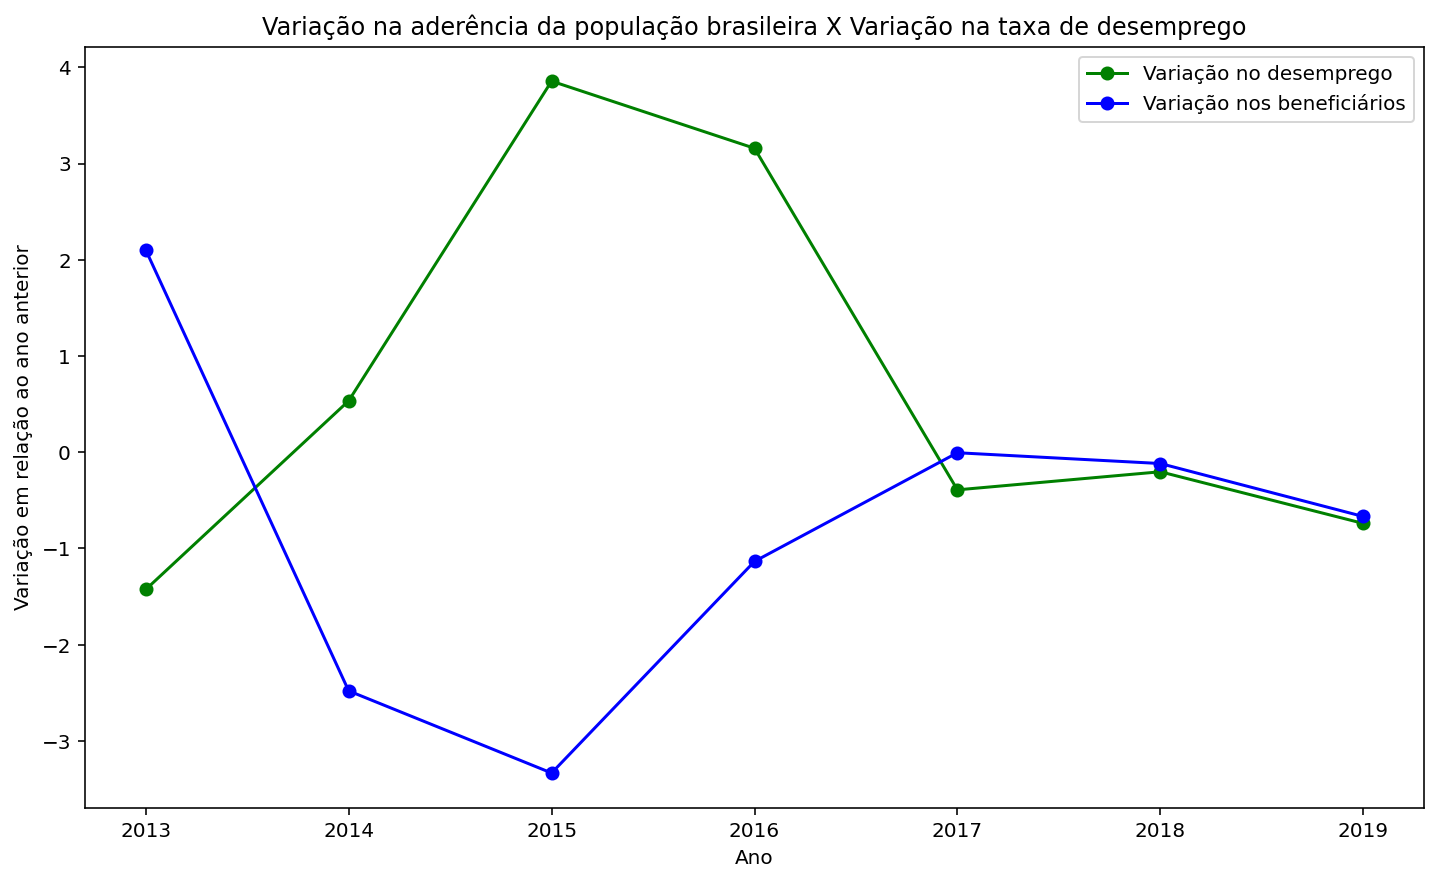

In [4]:
#O gráfico a seguir representa as variações anuais (em percentagem) na taxa de desemprego nacional e na aderência da população brasileira a planos de saúde (sendo aderência definida como a fração de um grupo que possui algum plano).
#É possível notar através do gráfico a seguir que a variação dos beneficiários acompanha de maneira oposta a variação da taxa de desemprego. Isso ocorre por dois motivos. alguns planos são aderidos coletivamente por meio das empresas que dão esse benefício a seus funcionários. Ao perder o emprego, automaticamente, o funcionário perde seu plano de saúde. O segundo motivo é mais simples: ao perder seu emprego, sua renda se reduz, fazendo com que o indivíduo precise reduzir alguns gastos, um desses gastos possíveis é o plano de saúde.
#Obs.:a variação percentual na taxa de desemprego foi dividida por 10 para haver melhor visualização).
plt.plot(anos,ndes, color='green', marker='o')
plt.plot(anos, nplanos, color='blue', marker='o')
plt.title('Variação na aderência da população brasileira X Variação na taxa de desemprego')
plt.legend(('Variação no desemprego','Variação nos beneficiários'))
plt.xlabel("Ano")
plt.ylabel('Variação em relação ao ano anterior')
plt.show()

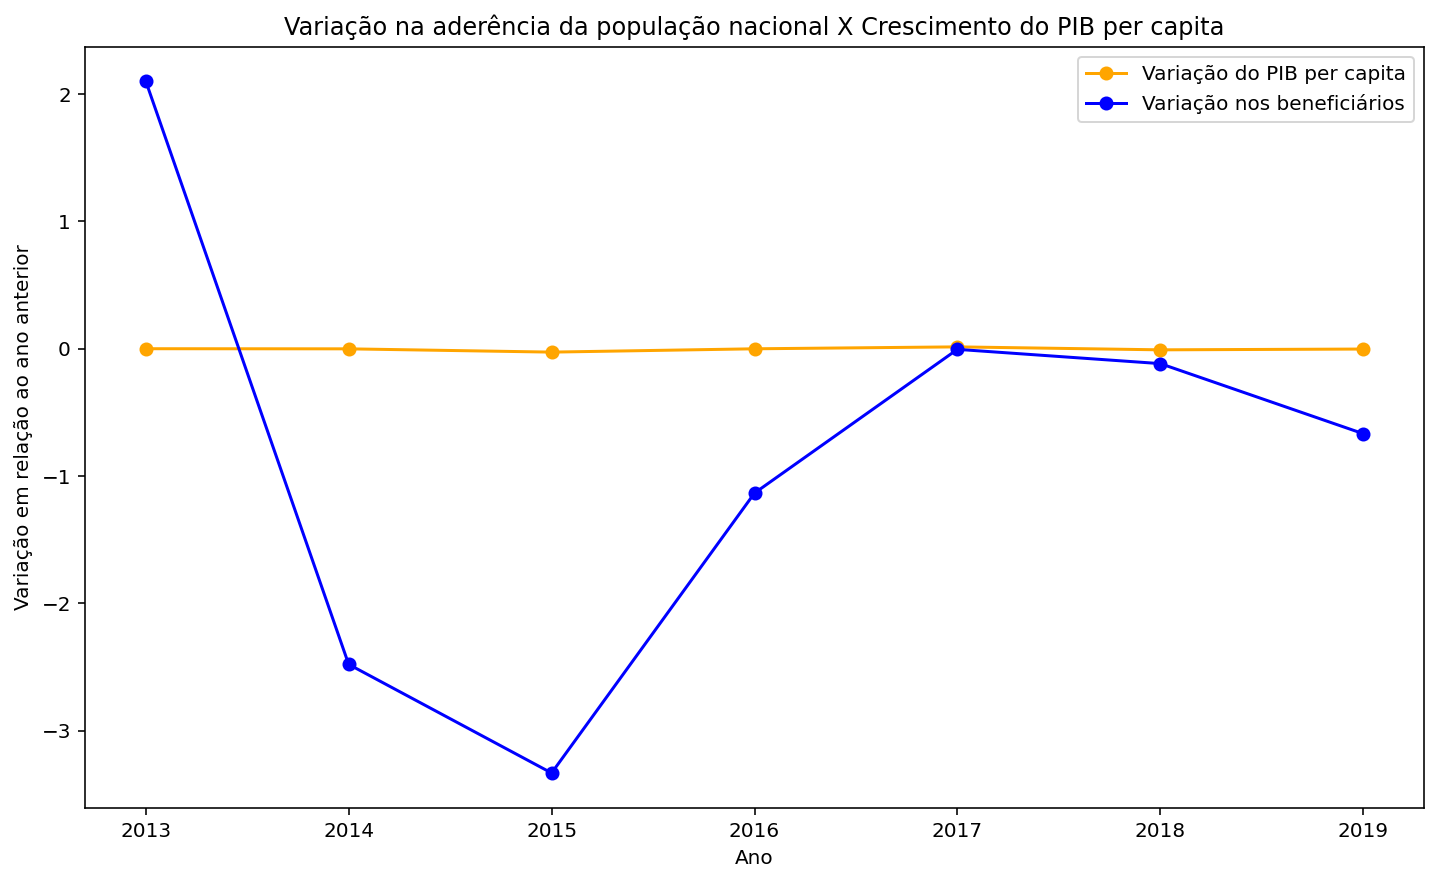

In [5]:
#O gráfico a seguir representa as variações anuais (em percentagem) no PIB per capita nacional e na aderência da população brasileira a planos de saúde.
#Percebe-se através desse segundo gráfico que a porcentagem de beneficiários varia bem próximo a variação do PIB per capita. O PIB per capita representa a renda média que cada brasileiro possui de acordo com a produção de um determinado período. Portanto, se ela se eleva, o indivíduo tem maior capacidade financeira, fazendo-o consumir mais bens, um deles é o plano de saúde. Caso ela contraia, ocorrerá o mesmo efeito do gráfico anterior, o indivíduo terá, então, de conter gastos, descartando o plano de saúde de sua cesta de consumo.
#Obs.:a variação percentual do PIB per capita foi dividida por 10 para haver melhor visualização).
pib=pib[0,55:63]
npib=[]
for i in range(7):
    npib+=[((pib[0,i+1]/pib[0,i])-1)/10]
plt.plot(anos,npib, color='orange', marker='o')
plt.plot(anos, nplanos, color='blue', marker='o')
plt.title('Variação na aderência da população nacional X Crescimento do PIB per capita')
plt.legend(('Variação do PIB per capita','Variação nos beneficiários'))
plt.xlabel("Ano")
plt.ylabel('Variação em relação ao ano anterior')
plt.show()

In [6]:
#Criação de listas com os dados da aderência de homens e mulheres de diferentes faixas etárias a planos de saúde
M_planos=[]
F_planos=[]
M_col=[]
F_col=[]
M_ind=[]
F_ind=[]
idades=[]
for i in range(9):
    M_planos+=[planos_si[7+i,2]/sex_idade[i,1]]
    F_planos+=[planos_si[7+i,1]/sex_idade[i,2]]
    M_col+=[planos_si[18+i,2]/sex_idade[i,1]]
    F_col+=[planos_si[18+i,1]/sex_idade[i,2]]
    M_ind+=[planos_si[29+i,2]/sex_idade[i,1]]
    F_ind+=[planos_si[29+i,1]/sex_idade[i,2]]
    if i<8:
        idades+=[str(10*i)+"a"+str(10*i+9)]
    else:
        idades+=["80 ou mais"]

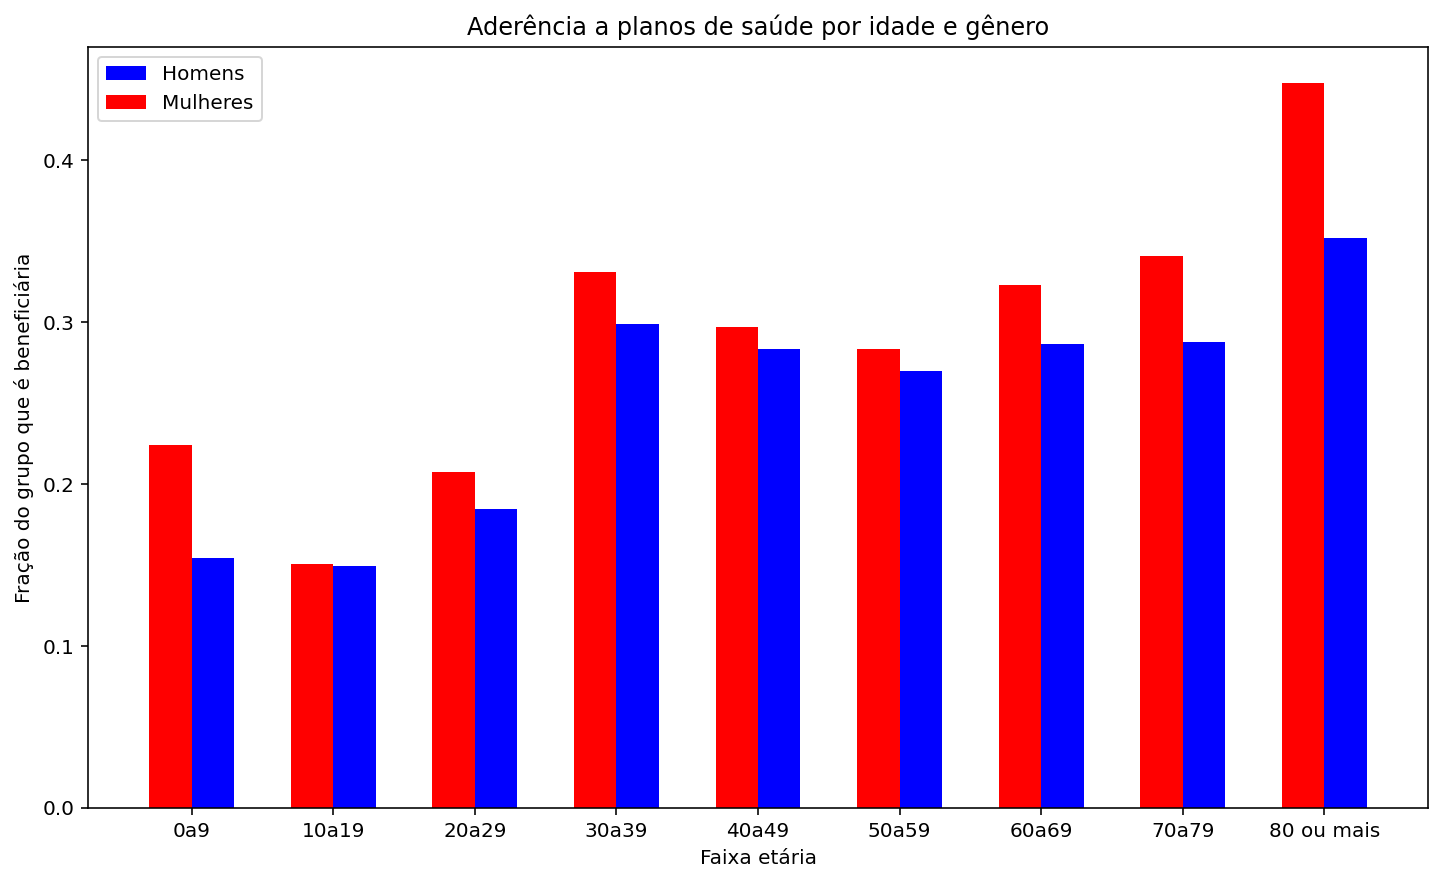

<Figure size 72x144 with 0 Axes>

In [7]:
#Esse gráfico representa a aderência a planos de saúde para homens e mulheres de diferentes faixas etárias.
#De maneira geral, podemos perceber que há maior aderência a planos de saúde na população feminina em todas as faixas etárias. Acreditamos que isso possa ser explicado por meio das vulnerabilidades físicas que acometem as mulheres ao longo da vida. Podemos citar como exemplo, gravidez, câncer de mama e de colo de útero e endometriose. Além disso, como forma de facilitar o acompanhamento dessas questões de saúde, o governo possui mais de 270 programas de incentivos junto às operadoras de planos de saúde, como descontos em planos para mulheres em determinadas faixas etárias.
plt.bar(idades, M_planos, 0.3, align="edge",label='Homens', color="Blue")
plt.bar(idades, F_planos, -0.3, align="edge",label='Mulheres', color="Red")
plt.legend(('Homens','Mulheres'))
plt.title('Aderência a planos de saúde por idade e gênero')
plt.ylabel("Fração do grupo que é beneficiária")
plt.xlabel("Faixa etária")
plt.figure(figsize=[1,2])
plt.show()

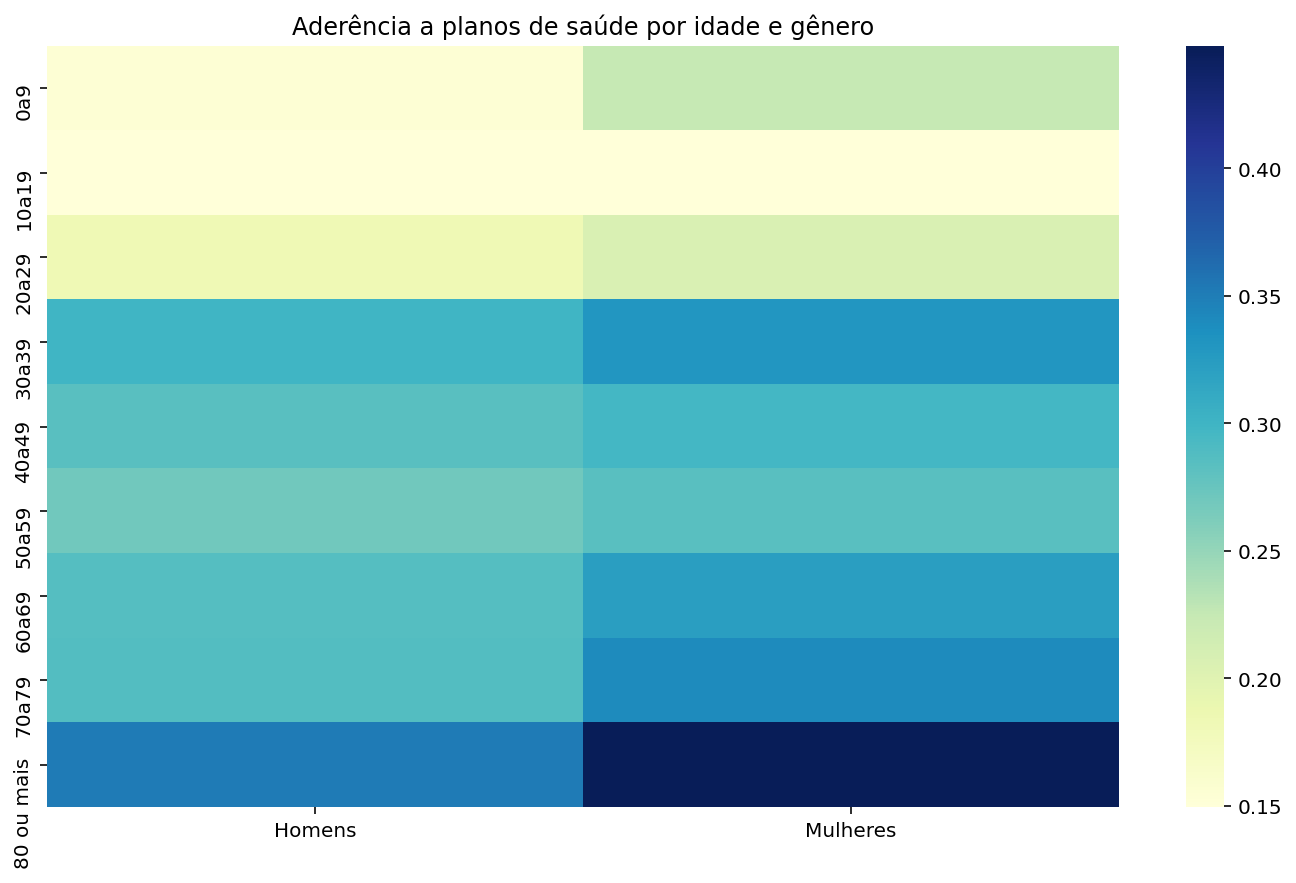

In [8]:
#Esse gráfico representa os mesmos dados que o anterior mas na forma de um mapa de calor
x=[]
for i in range(len(M_planos)):
    x+=[[M_planos[i],F_planos[i]]]
x=np.matrix(x)
plt.title('Aderência a planos de saúde por idade e gênero')
ax=sns.heatmap(x,cmap="YlGnBu",yticklabels=idades,xticklabels=['Homens','Mulheres'])

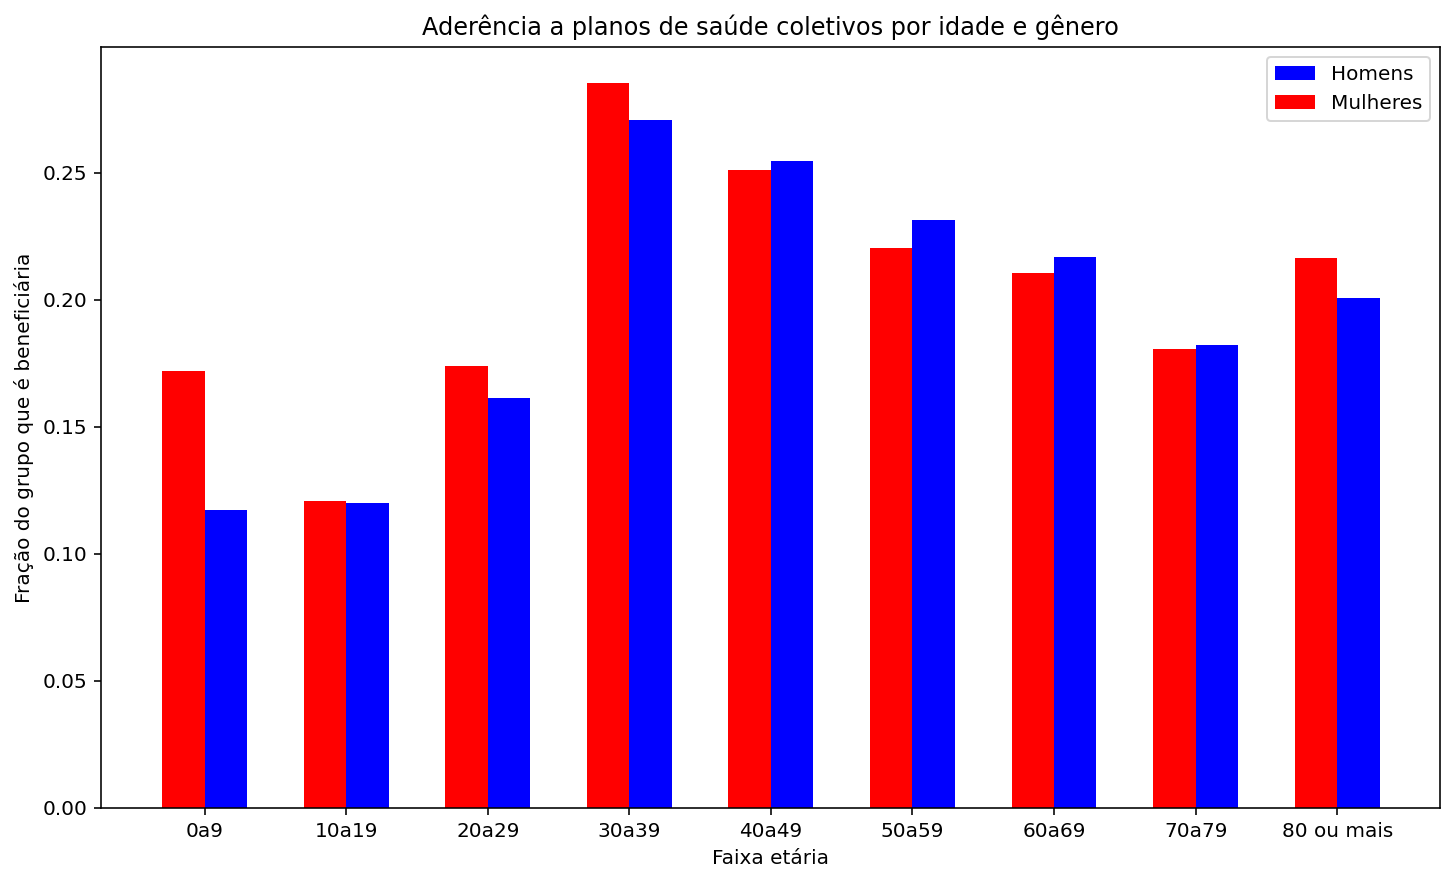

In [9]:
#O gráfico a seguir representa a adesão de homens e mulheres de diferentes faixas etárias a planos de saúde coletivos
#Nesse gráfico, vemos que a adesão aos planos coletivos na população masculina é maior que da população feminina em algumas faixas etárias. Pode-se explicar esse resultado com alguns dados do IPEA que indicam uma taxa de participação da população masculina na força de trabalho (em torno de 85%) maior do que  a feminina (entre 60% a 65%). Desse modo, podemos afirmar que a maior adesão aos planos coletivos (aqueles disponibilizados por empresas) de saúde da população masculina decorre do fato de a porcentagem de homens empregados em idade econômica ativa ser maior que das mulheres.
plt.bar(idades, M_col, 0.3, align="edge",label='Homens', color="Blue")
plt.bar(idades, F_col, -0.3, align="edge",label='Mulheres', color="Red")
plt.legend(('Homens','Mulheres'))
plt.title('Aderência a planos de saúde coletivos por idade e gênero')
plt.ylabel("Fração do grupo que é beneficiária")
plt.xlabel("Faixa etária")
plt.show()

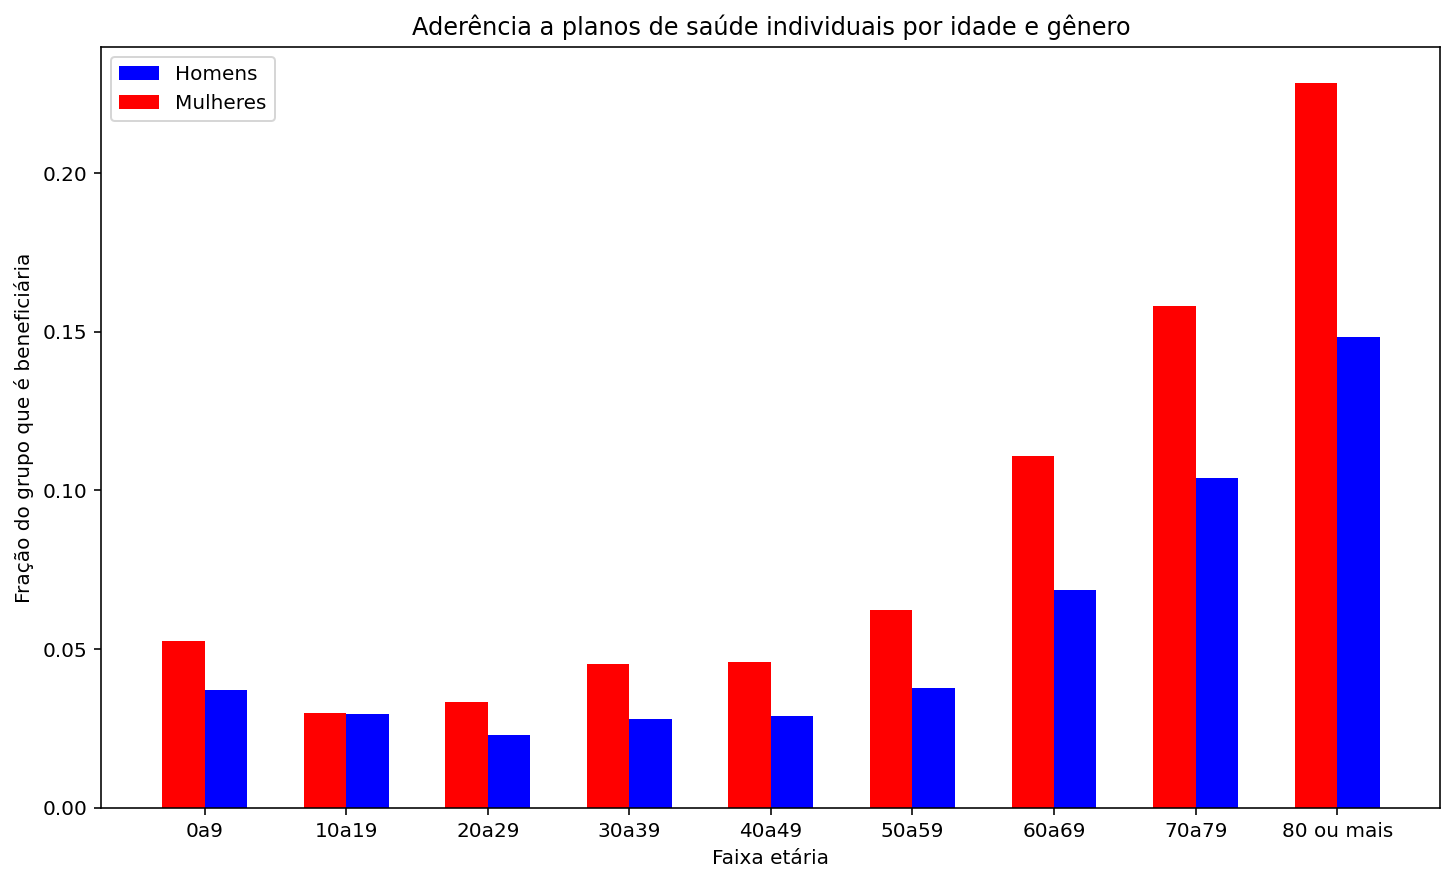

In [10]:
#O gráfico a seguir representa a adesão de homens e mulheres de diferentes faixas etárias a planos de saúde individuais
#Por outro lado, quando se trata de uma adesão individual, sendo ela uma escolha voluntária do indivíduo, vemos que as taxas de adesão das mulheres ultrapassam a dos homens em todas as idades. Além disso, é interessante nota que, em especial, as faixas etárias mais elevadas possuem uma maior taxa de adesão para ambos os sexos, visto que os problemas de saúde começam a ser mais recorrentes.
plt.bar(idades, M_ind, 0.3, align="edge",label='Homens', color="Blue")
plt.bar(idades, F_ind, -0.3, align="edge",label='Mulheres', color="Red")
plt.legend(('Homens','Mulheres'))
plt.title('Aderência a planos de saúde individuais por idade e gênero')
plt.ylabel("Fração do grupo que é beneficiária")
plt.xlabel("Faixa etária")
plt.show()

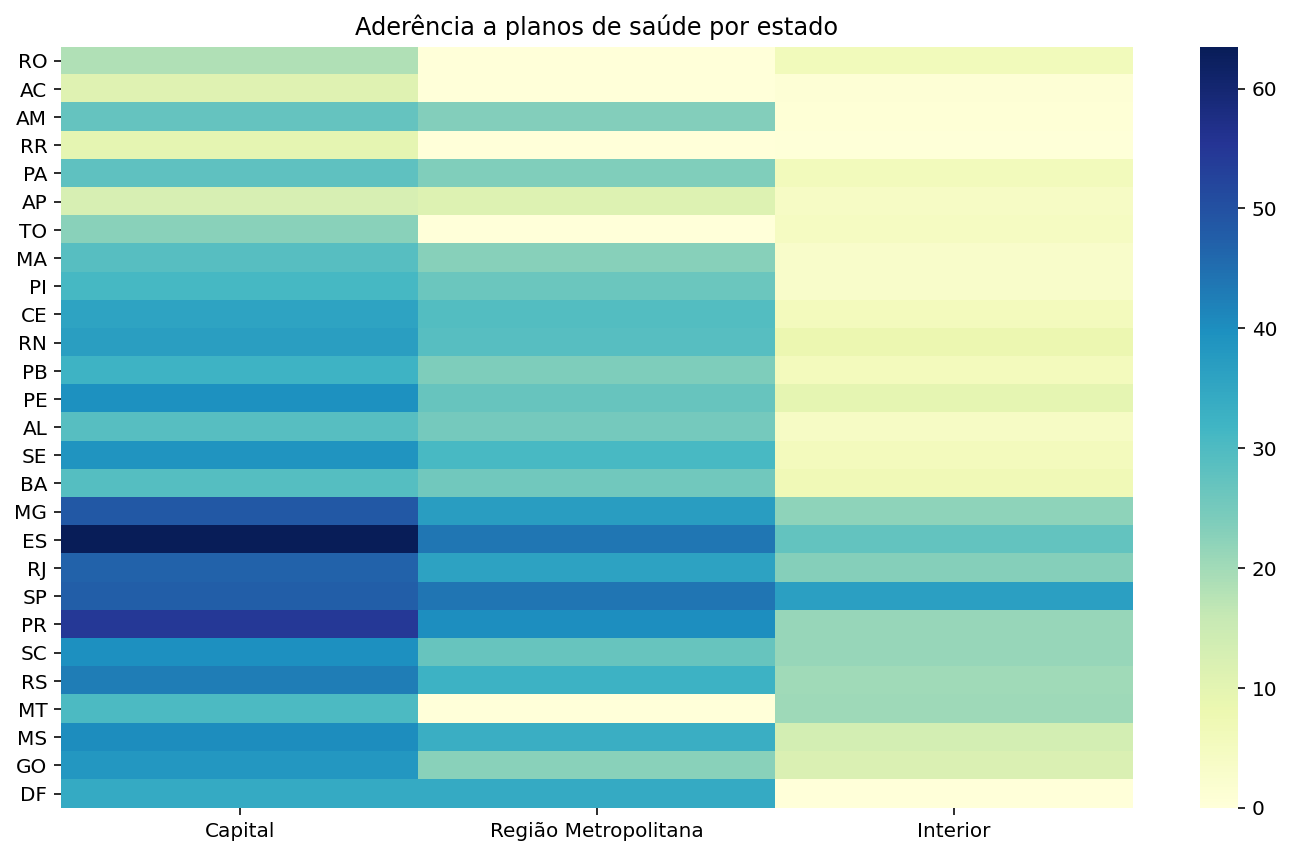

In [11]:
#O gráfico a seguir é uma mapa de calor que nos revela a adesão a planos de saúde em áreas distintas de cada estado: capital, região metropolitana e interior.
#De forma geral, notamos um padrão: quanto mais próximo da capital ou quanto mais desenvolvida for a região, maior será a adesão aos planos. Acreditamos que isso ocorra por conta da maior presença/oferta de clínicas e hospitais em regiões mais desenvolvidas do país, dificultando, assim, a adesão em regiões menos desenvolvidas, além de as populações dos centros urbanos terem, via de regra maior poder aquisitivo. Há apenas duas exceções mais discrepantes: Mato Grosso e São Paulo. A primeira região possui maior número relativo de adesão no interior do que na região metropolitana. Enquanto a segunda é mais equilibrada, o que, provavelmente, se deve ao fato de que o estado de São Paulo possua um melhor desenvolvimento urbano, tornando áreas distantes mais acessíveis, ou até mesmo, possibilitando uma oferta de clínicas e hospitais mais bem distribuídas ao longo do território do estado em questão.
estados=['RO','AC','AM','RR','PA','AP','TO','MA','PI','CE','RN','PB','PE','AL','SE','BA','MG','ES','RJ','SP','PR','SC','RS','MT','MS','GO','DF']
regioes=['Capital','Região Metropolitana','Interior']
saude_r=[]
for i in range(31):
    if i not in[7,17,22,26]:
        saude_r+=[[planos_est[9+i,1],planos_est[9+i,2],planos_est[9+i,3]]]
saude_r=np.matrix(saude_r)
plt.title('Aderência a planos de saúde por estado')
ax=sns.heatmap(saude_r,cmap="YlGnBu",yticklabels=estados,xticklabels=regioes)
plt.show()

Aderência a planos de saúde por estado


<AxesSubplot:>

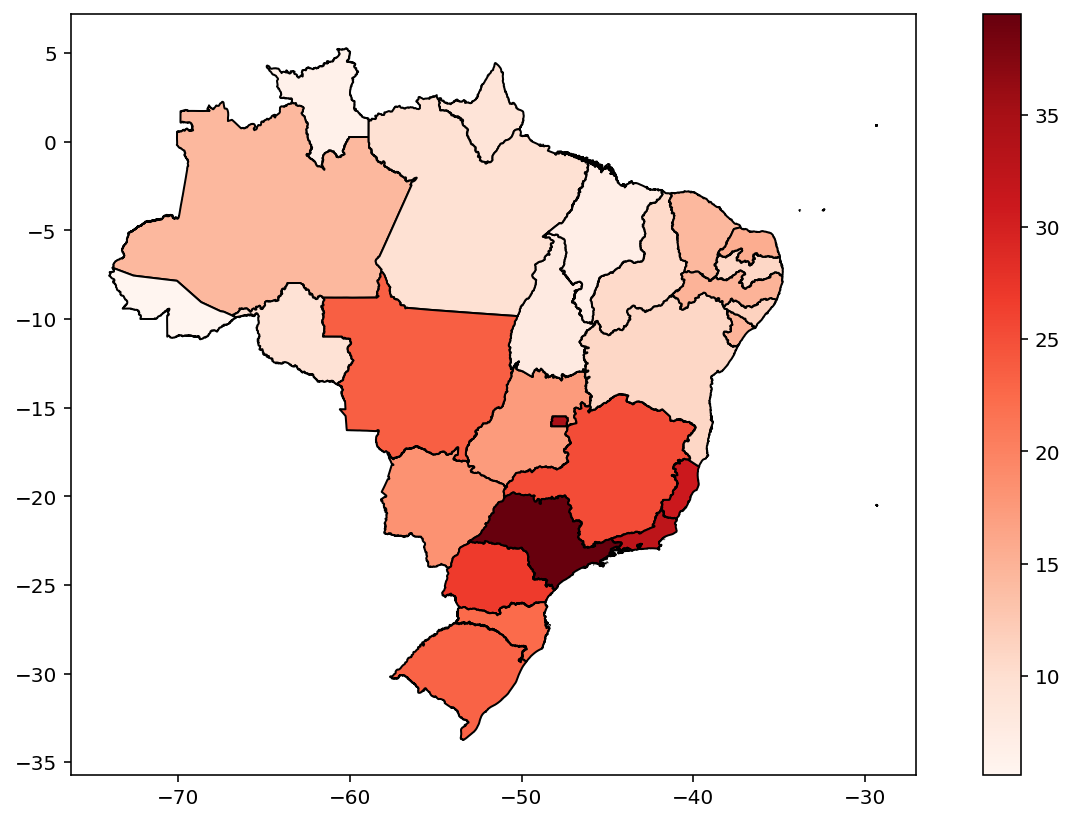

In [12]:
#Em seguida, está representado um mapa coroplético do Brasil, no qual quanto mais escuro o tão de vermelho, maior é a aderência a planos de saúde.
#É possível notar que as regiões mais desenvolvidas (com maiores PIBs) possuem maior concentração de planos de saúde, tanto coletivos, quanto individuais. Essas regiões são Sul, Sudeste e Distrito Federal. Apenas no Centro-Oeste vemos a exceção do estado de Mato Grosso, novamente, que é um estado com PIB não tão elevado quanto de São Paulo e Rio de Janeiro, por exemplo, mas também possui alta adesão de planos de saúde.
planos_map=np.matrix(pd.read_excel("caderno_set20.xls",sheet_name='tab 4'))
brazil=gpd.read_file('bcim_2016_21_11_2018.gpkg',layer='lim_unidade_federacao_a')
mapa_planos=[]
for i in range(31):
    if i not in[7,17,22,26]:
        mapa_planos+=[planos_est[9+i,0]]
data_saude={'sigla':estados,'planos':mapa_planos}
data_saude=pd.DataFrame(data=data_saude)
brazil=brazil.merge(data_saude, on='sigla',how='left')
print('Aderência a planos de saúde por estado')
brazil.plot(column='planos',cmap='Reds',legend='True',edgecolor='black')

In [13]:
#Importando os dados dos planos de saúde do ano de 2019.
planos_si19=np.matrix(pd.read_excel("caderno_set19.xls",sheet_name='tab 5',index_col=0))
planos_est19=np.matrix(pd.read_excel("caderno_set19.xls",sheet_name='tab 4',index_col=0))
planos19=np.matrix(pd.read_excel("caderno_set19.xls",sheet_name='tab 1',index_col=0))

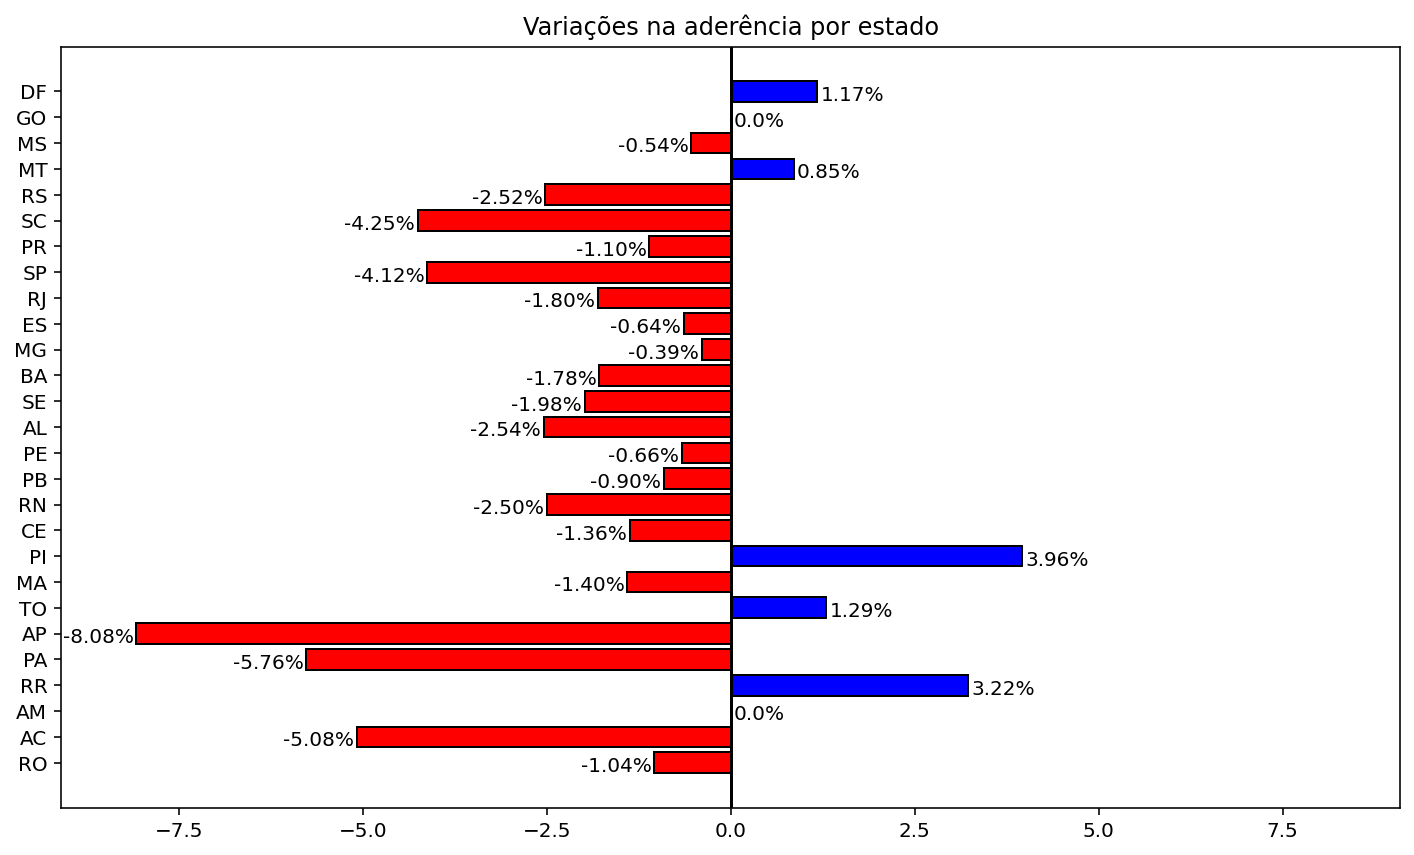

In [14]:
#Nesse gráfico, vemos a variação da aderência aos planos de saúde por estado, entre setembro de 2019 e setembro de 2020.
#Apesar da crise econômica do país decorrente da pandemia do Coronavírus ter afetado todo o país, notamos que seu efeito na aderência aos planos de saúde foi muito heterogêneo. Estados como Roraima e Piauí tiveram forte aumento, enquanto São Paulo, Pará, Acre e Santa Catarina tiveram uma redução de mais de 4%.
cor=[]
saude_r_dif=[]
for i in range(31):
    if i not in[7,17,22,26]:
        x=100*(planos_est[9+i,0]-planos_est19[9+i,0])/planos_est19[9+i,0]
        if x>0:
            cor+=['blue']
        else:
            cor+=['red']
        saude_r_dif+=[x]
plt.barh(estados, saude_r_dif,color=cor, edgecolor='black')
for i in range(len(estados)):
    if saude_r_dif[i]<0:
        plt.text(saude_r_dif[i]-1,i-0.35,s=str(saude_r_dif[i])[:5]+'%')
    else:
        plt.text(saude_r_dif[i]+0.04,i-0.35,s=str(saude_r_dif[i])[:4]+'%')
plt.axvline(0,color='black')
plt.xlim(-9.1,9.1)
plt.title('Variações na aderência por estado')
plt.show()

Variações na aderência por estado


<AxesSubplot:>

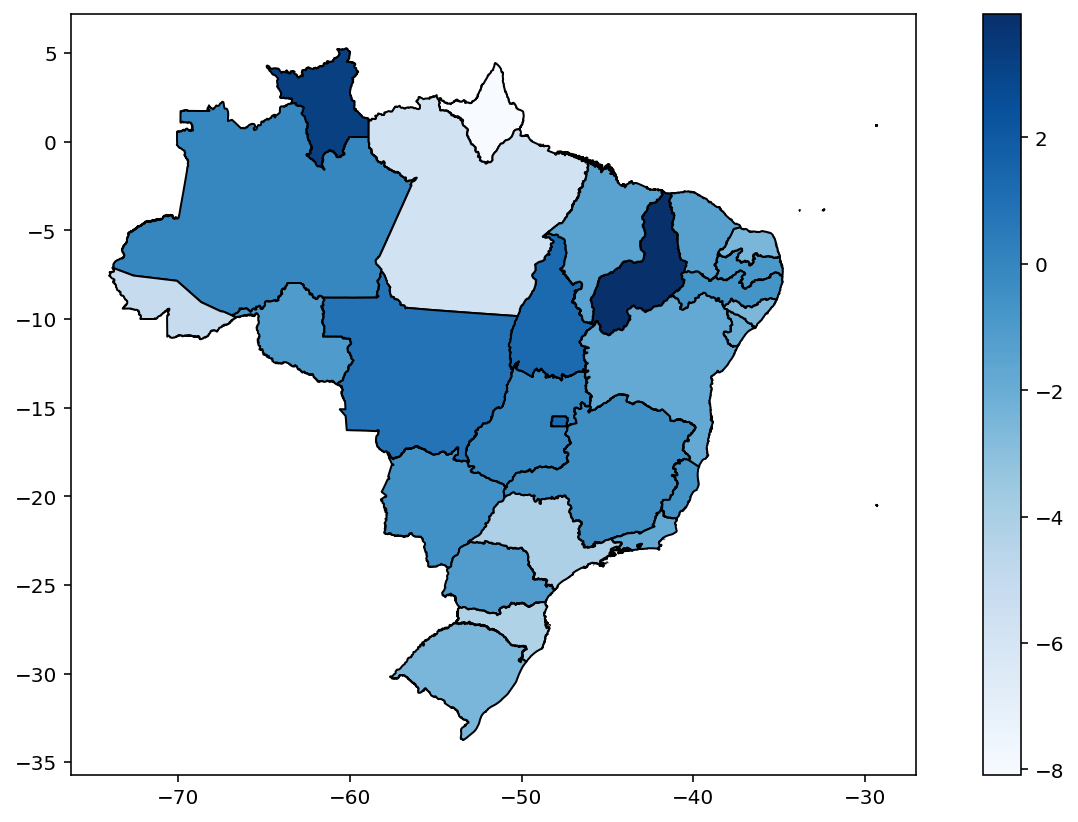

In [15]:
#Por fim, temos a representação dos dados do gráfico anterior na forma de uma mapa coroplético no qual quanto mais intenso é o tom de azul, mais positiva é a variação na aderência do estado em questão.
data_vari={'sigla':estados,'variacao':saude_r_dif}
data_vari=pd.DataFrame(data=data_vari)
brazil=brazil.merge(data_vari, on='sigla',how='left')
print('Variações na aderência por estado')
brazil.plot(column='variacao',cmap='Blues',legend='True',edgecolor='black')